This notebook is used for the capstone project of the IBM Data Science Course

## Business understanding:

The main objective of current data science project is to reduce the collision rate in a community. Specifically, this report will be targeted to drivers driving on bad road conditions along highways in **Seattle**, USA.


To achieve this goal, we will apply machine learning algorithm to predict the severity level of car accident by training the historical traffic collision data. In practce, the model should work like this: It receives real-time road condition data and alert drivers with a predicted collision severity level so that the drivers can take precautions accordingly.

A few questions need to be answered:
How many severity levels are there and what are they?
How many collisions types are there and which is most frequently happend?
Which attibutes are of interets for performing the prediction?
Which machine learning models fit the problem and how to evaluate its prediction quality?

## Data understanding:

The data consists of collision events taking places at Seattle from 2004/01/01 to 2020/05/20. Each row represents a collison event. In total there are 194673 events are recorded.
Based on the definition of our problem, information that is needed are:
* road conditions when the collision happened
* data measuring the severity level of collision

As a result, the following attributes will be considered:
* The target field is 'SEVERITYCODE', as it is used measure the severity of an accident. It has two possible values, as follows 1—prop damage, 2—injury.
* Attributes will be used to predict the severity level are 'WEATHER', 'ROADCOND' and 'LIGHTCOND', which are weather condition, road condition and light conditions, respectively. These attributes are categorical, so we will convert these features to numerical values so that the machine learning models can handle it. 


A few steps will be taken to prepare the data for modeling:
* Data wrangling. To work effectively with the data, it will prepared in a way that addresses missing or invalid values and removes duplicates, toward ensuring that everything is properly formatted.
* Data ballance.
* Feature engineering. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


load the data using read_csv function and check the first five rows using the head() 

In [3]:
df=pd.read_csv('Data-Collisions.csv')
df.head()

/home/xinyuan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Check the size of the dataset

In [4]:
df.shape

(194673, 38)

The next step is to udnerstand the 4 variables to be used for prediction, which are 'WEATHER', 'ROADCOND', 'LIGHTCOND' and 'SEVERITYCODE'.

For road condition, there are 10 distinct values, out of which 'nan' and 'Unknown' should be droped out as they are missing values. Thus in total there are 8 road conditions: 'Wet' 'Dry' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt' 'Standing Water' 'Oil'

In [5]:
print(df['ROADCOND'].unique())

['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']


For weather condition, there are 12 distinct values, out of which 'nan' and 'Unknown' should be droped for the same reason. Thus in total there are 10 weather conditions: 'Overcast' 'Raining' 'Clear' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind' 'Partly Cloudy'

In [6]:
print(df['WEATHER'].unique())

['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']


For light condition, there are 10 distinct values, out of which 'nan' and 'Unknown' should be droped are for the same reason. 'Dark - No Street Lights' and 'Dark - Street Lights Off' should be merged as they represent the same condition. Thus in total there are 7 light conditions: 'Daylight' 'Dark - Street Lights On' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other' 'Dark - Unknown Lighting'

In [7]:
print(df['LIGHTCOND'].unique())

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


Create a new dataframe df_1 only contains the 4 columns of interests

In [8]:
df_1= df[['ROADCOND','WEATHER','LIGHTCOND','SEVERITYCODE']]

Drop the rows with missing values and merge the light conditions of the same meaning. 

In [9]:
df_1.replace("Unknown", np.nan, inplace = True)
df_1 = df_1.dropna()
df_1['LIGHTCOND'].replace("Dark - No Street Lights", "Dark - Street Lights Off", inplace = True)
df_1.head()

/home/xinyuan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,Wet,Overcast,Daylight,2
1,Wet,Raining,Dark - Street Lights On,1
2,Dry,Overcast,Daylight,1
3,Dry,Clear,Daylight,1
4,Wet,Raining,Daylight,2


After cleaning the data, the frequency of each conditions are examined to understand their distrition. As can be seen that dry, wet, ice and snow are the most frequent factors. However, thus doesn't mean these factors leads to the collision. As for the weather conditions, clear, raning and overcast are the top three most frequent conditions. And the light conditions are distributed more evenly. It seems that the collision are mostly like happen at good conditions when road is dry, weather clear and during day time. This does make sense as the collisions tend to happen when the roads are busy. And no conclusion can be reached so far. 

In [10]:
df_1['ROADCOND'].value_counts()

Dry               121754
Wet                46469
Ice                 1096
Snow/Slush           845
Other                111
Standing Water       108
Sand/Mud/Dirt         66
Oil                   61
Name: ROADCOND, dtype: int64

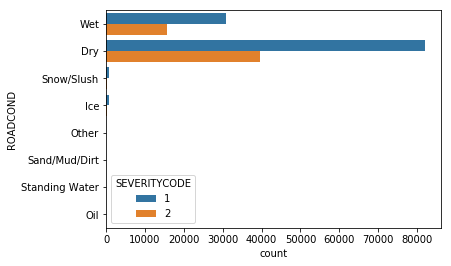

In [11]:
sns.countplot(y="ROADCOND",hue="SEVERITYCODE",data=df_1)

In [12]:
df_1['WEATHER'].value_counts()

Clear                       108960
Raining                      32735
Overcast                     26977
Snowing                        831
Fog/Smog/Smoke                 555
Other                          264
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               47
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

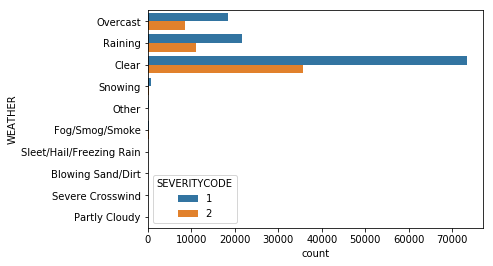

In [13]:
sns.countplot(y="WEATHER",hue="SEVERITYCODE",data=df_1)

In [14]:
df_1['LIGHTCOND'].value_counts()

Daylight                    112836
Dark - Street Lights On      46845
Dusk                          5662
Dark - Street Lights Off      2533
Dawn                          2424
Other                          201
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

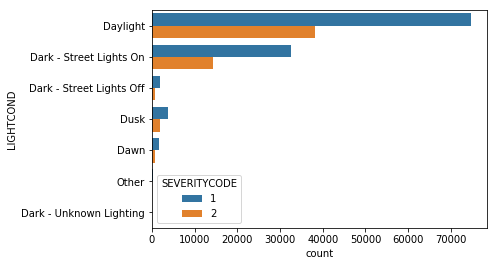

In [15]:
sns.countplot(y="LIGHTCOND",hue="SEVERITYCODE",data=df_1)

Then it's time to check the ballance of the target varable. As can be seen that the quantity of severity 1 events is nearly double that of severity 2. To make an accurate prediction, the severity 1 events are sampled with the same amount of severity 2.  

In [16]:
df_1['SEVERITYCODE'].value_counts()

1    114659
2     55851
Name: SEVERITYCODE, dtype: int64

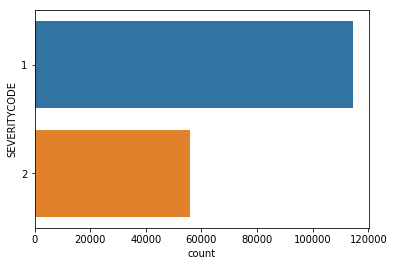

In [17]:
sns.countplot(y="SEVERITYCODE",data=df_1)

In [18]:
df_2 = df_1[df_1['SEVERITYCODE']==1].sample(n=55851)
df_2.shape

(55851, 4)

In [19]:
df_3 = df_2.append(df_1[df_1['SEVERITYCODE']==2])
df_3['SEVERITYCODE'].value_counts()

2    55851
1    55851
Name: SEVERITYCODE, dtype: int64

In [20]:
df_3 = df_3.sample(frac = 1) 
df_3 = df_3.reset_index()
df_3.head()

,index,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,88488,Dry,Clear,Dark - Street Lights On,2
1,163691,Dry,Clear,Daylight,2
2,80000,Dry,Clear,Daylight,2
3,154792,Dry,Clear,Dark - Street Lights On,2
4,46137,Wet,Raining,Dark - Street Lights On,2


Then histograms of the variables were examined to understand their distributions. As can be seen that after data ballancing, the quantity of severity 1 and severiy 2 events are almot equal for each condition. 

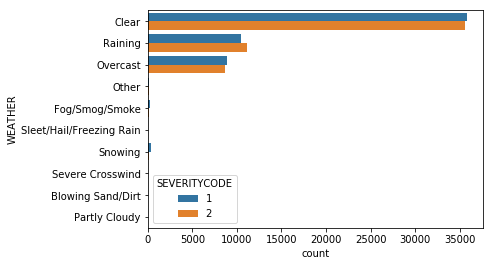

In [21]:
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_3)

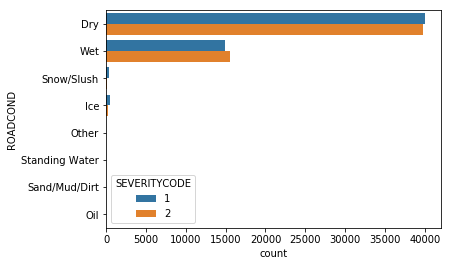

In [22]:
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df_3)

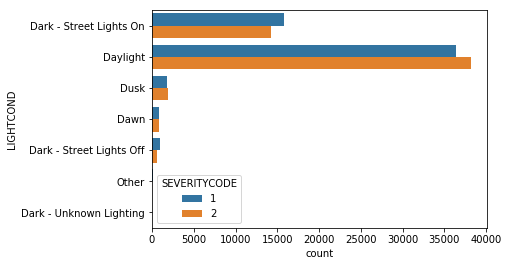

In [23]:
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_3)

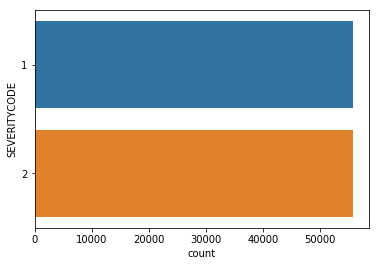

In [24]:
sns.countplot(y="SEVERITYCODE",data=df_3)

## Pre-processing
</div>
Using <b>df_3</b> for setting up the algorithm and declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix ('WEATHER', 'ROADCOND', 'LIGHTCOND')</b> </li>
    <li> <b> y </b> as the <b> response vector ('SEVERITYCODE') </b> </li>
</ul>

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [25]:
X = df_3[['WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

array([['Clear', 'Dry', 'Dark - Street Lights On'],
       ['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Dark - Street Lights On'],
       ['Raining', 'Wet', 'Dark - Street Lights On']], dtype=object)

Convert these categorical variables to numerical values by using the preprocessing function in sklearn

In [26]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X[:,0] = le_weather.transform(X[:,0]) 


le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'])
X[:,1] = le_roadcond.transform(X[:,1])


le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit(['Daylight', 'Dark - Street Lights On', 'Dark - Street Lights Off',
       'Dusk', 'Dawn', 'Other', 'Dark - Unknown Lighting'])
X[:,2] = le_lightcond.transform(X[:,2]) 

X[0:5]

array([[1, 0, 1],
       [1, 0, 4],
       [1, 0, 4],
       [1, 0, 1],
       [6, 7, 1]], dtype=object)

In [27]:
df_final = pd.get_dummies(df_3[['WEATHER', 'ROADCOND', 'LIGHTCOND']], columns=['WEATHER', 'ROADCOND', 'LIGHTCOND'], drop_first=True)
df_final.head()

,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Ice,...,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [28]:
y = df_3["SEVERITYCODE"].values
y[0:5]

array([2, 2, 2, 2, 2])

### Normalize Data 
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/xinyuan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xinyuan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.7100238 , -0.62485957, -1.52860708],
       [-0.7100238 , -0.62485957,  0.59783663],
       [-0.7100238 , -0.62485957,  0.59783663],
       [-0.7100238 , -0.62485957, -1.52860708],
       [ 1.6798719 ,  1.61727803, -1.52860708]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [31]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78191, 3) (78191,)
Test set: (33511, 3) (33511,)


## Methodelegy

The problem at hand wil be solved by classification algorithms and current study will apply: 
* K nearest neighbor (KNN)
* Decision Tree
* Logistic Regression




###  K nearest neighbor (KNN)
 K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification. KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Lets start the algorithm with k = 8:

In [39]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

We can use the model to predict the test set:

In [40]:
y_test_predKNN = neigh.predict(X_test)

###  Evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [41]:
from sklearn import metrics
print("Test set accuracy: ", metrics.accuracy_score(y_test, y_test_predKNN))

Test set accuracy:  0.5072961117245084


#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [36]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5017457 , 0.50079079, 0.50249172, 0.50210379, 0.50186506,
       0.50598311, 0.50646057, 0.50729611, 0.506192  ])

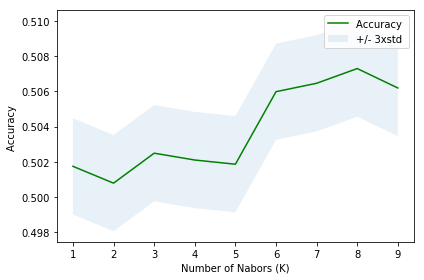

In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5072961117245084 with k= 8


### Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different conditions.

We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>decisionTree</b>.<br>


In [72]:
from sklearn.tree import DecisionTreeClassifier

Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node. 
Next, we will fit the data with the training feature matrix X_train and training response vector y_train

In [73]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9).fit(X_train,y_train)

Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>y_test_predTree</b>.

In [74]:
y_test_predTree = decisionTree.predict(X_test)


  ###  Evaluation
let's use the __accuracy classification score__  to calculates how closely the actual labels and predicted labels are matched in the test set.

In [62]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_test_predTree))

Test set Accuracy:  0.5185163080779446


In [51]:
Dps = 12
mean_acc = np.zeros((Dps-1))
std_acc = np.zeros((Dps-1))
ConfustionMx = [];
for n in range(1,Dps):
    
    #Train Model and Predict  

    decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=decisionTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51618871, 0.51672585, 0.51657665, 0.51747187, 0.51744203,
       0.51777028, 0.51788965, 0.51839694, 0.51851631, 0.51839694,
       0.51794933])

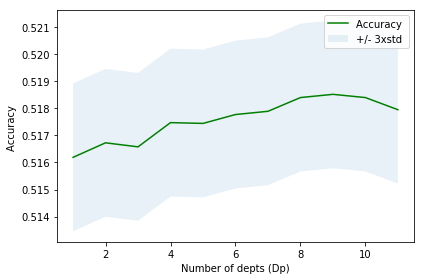

In [54]:
plt.plot(range(1,Dps),mean_acc,'g')
plt.fill_between(range(1,Dps),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of depts (Dp)')
plt.tight_layout()
plt.show()

In [55]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5185163080779446 with k= 9


## Logistic Regression
Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. Let's first apply the 'liblinear' optimizer.

Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Let's first try with 0.01. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [56]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

Now we can predict using our test set:

In [67]:
y_test_predLR = LR.predict(X_test)

###  Evaluation
let's use the __accuracy classification score__  to calculates how closely the actual labels and predicted labels are matched in the test set. It's the same as jaccard index for accuracy evaluation.

In [75]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_test_predLR))

Test set Accuracy:  0.5158903046760765
Test set f1 score:  0.384909952606635


In [59]:
Cs = [0.1,0.01,0.001,0.0001,0.00001]
Csl= len(Cs)
mean_acc = np.zeros((Csl))
std_acc = np.zeros((Csl))
ConfustionMx = [];
for i,n in enumerate(Cs):
    
    #Train Model and Predict  

    LR = LogisticRegression(C=n, solver='liblinear').fit(X_train,y_train)
    yhat=LR.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51577094, 0.51580078, 0.5158903 , 0.5158903 , 0.51577094])

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

__y_test_predLR_prob__  returns estimates for all classes, ordered by the label of classes. 

In [63]:
from sklearn.metrics import log_loss
y_test_predLR_prob = LR.predict_proba(X_test)
log_loss(y_test, y_test_predLR_prob)

0.69296608708792

We can use classification_report to get a more detailed overview of the prediction, where
- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)


The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels. It can be concluded that decision tree and logistic regression give better results. 

In [64]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_predKNN))

             precision    recall  f1-score   support

          1       0.50      0.54      0.52     16602
          2       0.51      0.48      0.50     16909

avg / total       0.51      0.51      0.51     33511



In [65]:
print (classification_report(y_test, y_test_predTree))

             precision    recall  f1-score   support

          1       0.53      0.26      0.34     16602
          2       0.52      0.78      0.62     16909

avg / total       0.52      0.52      0.48     33511



In [69]:
print (classification_report(y_test, y_test_predLR))

             precision    recall  f1-score   support

          1       0.52      0.31      0.38     16602
          2       0.51      0.72      0.60     16909

avg / total       0.52      0.52      0.49     33511

